In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from preprocessing import preprocess

# Lee el archivo xlsx
df = pd.read_excel("../Abraham/data/cefr_leveled_texts.xlsx")
# Eliminar caracteres de escape y espacios en blanco al principio y al final de cada texto
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True).str.strip()
# Preprocesamiento de los textos y etiquetas
preproc_data, labels = preprocess(df)
preproc_data = preproc_data.fillna(0)
# Escalado de los datos preprocesados
scaler = StandardScaler()
preproc_data = pd.DataFrame(scaler.fit_transform(preproc_data), columns=preproc_data.columns)
# Agregar la columna 'label' al DataFrame preprocesado
preproc_data['label'] = labels
# Mostrar una muestra de los datos preprocesados con la columna 'label' al final
preproc_data.sample(5)


,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard,...,mean_part,mean_pron,mean_propn,mean_punct,mean_sconj,mean_sym,mean_verb,mean_x,mean_space,label
1085,-0.727175,0.929960,0.675040,0.653765,0.586474,0.669215,0.611221,1.470753,0.583776,0.724018,...,0.073148,-0.676149,1.094358,-0.613565,0.242351,-0.334503,0.724322,-0.196993,0.623286,4
771,0.965249,-0.948921,-0.821265,-0.997792,-0.912847,-0.932864,-0.732086,-0.695807,-0.774250,-1.147001,...,0.901571,1.762626,-0.737116,-0.327339,0.051867,-0.334503,0.094035,-0.196993,0.623286,3
336,0.777145,-0.775486,-0.957293,-1.321139,-1.254465,-0.598183,-0.890122,-0.974935,-1.116164,-1.147001,...,0.004113,0.671595,-0.985834,-0.613565,-0.557683,-0.334503,-0.945387,-0.196993,0.623286,1
704,0.233734,0.178408,-0.027770,-0.012828,0.017111,-0.076959,-0.463424,0.378169,0.022747,-0.211491,...,0.521877,-0.119937,-0.722042,-0.613565,-0.291005,-0.334503,0.204611,-0.196993,-0.893308,2
1472,-1.515274,1.132301,1.536549,1.362641,1.630305,1.058761,1.385597,1.696714,1.286867,1.425650,...,0.625430,0.136776,0.868250,2.763897,1.651934,-0.334503,1.664224,-0.196993,0.623286,5


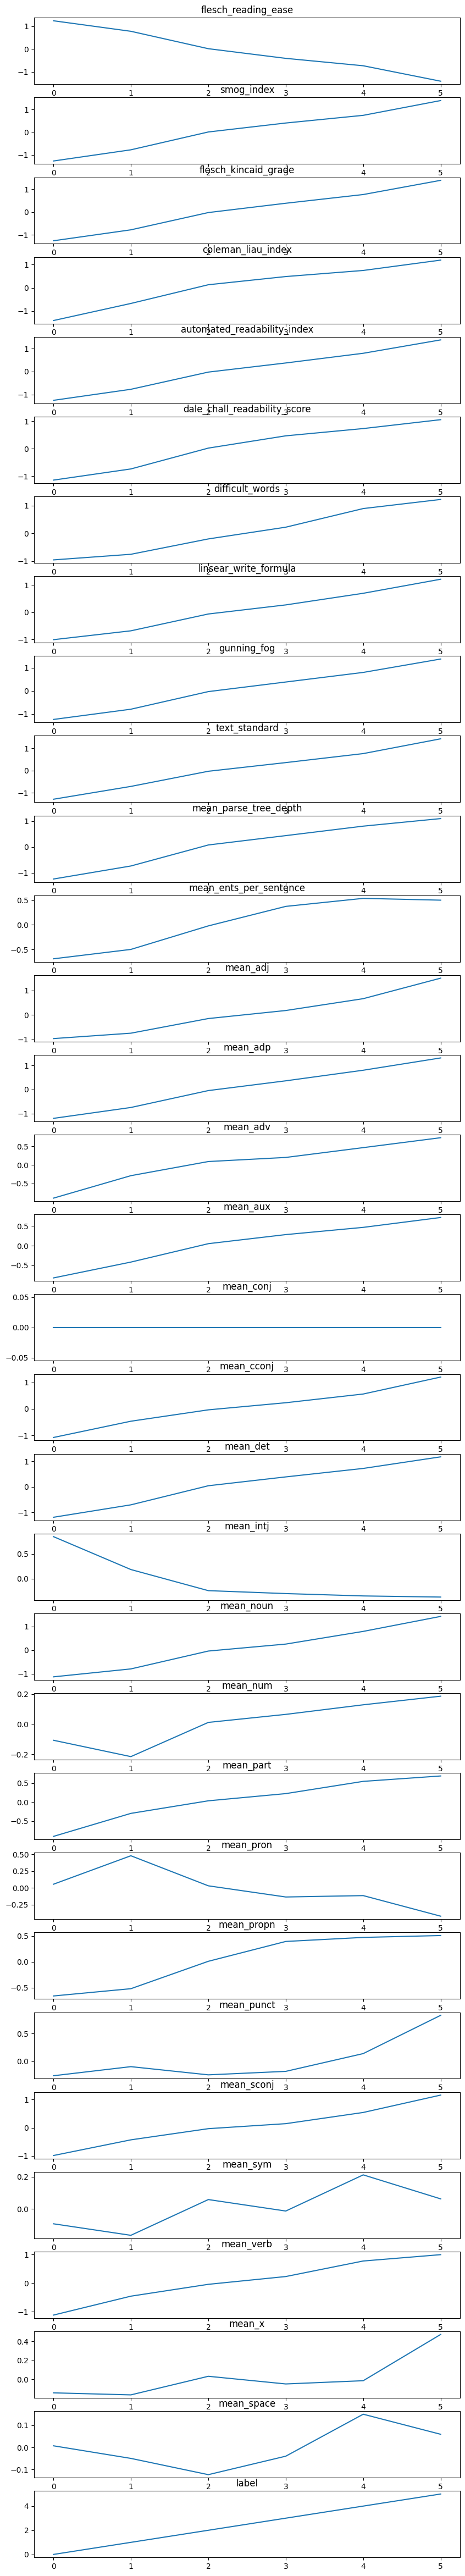

In [4]:
import matplotlib.pyplot as plt

mean_scores = {}
for column in preproc_data.columns:
    mean = preproc_data.groupby("label")[column].mean()
    mean_scores[column] = mean


fig, axs = plt.subplots(len(mean_scores))
fig.set_size_inches((10, 60))
for i, (title, data) in enumerate(mean_scores.items()):
    axs[i].plot(data.index, data.values)
    axs[i].set_title(title)


In [ ]:
preproc_data.to_csv("data/CEFR/preprocessed_cefr_leveled_texts.csv", index=False)